## Multiple regression

Lets look at a dataset made up of $4$ variables: $x$, $y$, $z$, and $r$.

In [2]:
dta <- read.csv('multipleData.csv')
head(dta)

x,y,z,r
<dbl>,<dbl>,<dbl>,<dbl>
-0.9082393,0.30143444,2.287881,-10.61071
-0.2554406,0.80946626,6.093306,-10.86466
1.2185192,2.33952550,7.383286,-8.01159
-1.3996301,4.17670312,7.174199,-15.69763
0.9467331,0.44573692,5.719590,-10.40901
-0.2311548,0.08942789,1.201217,-5.03375


Just like simple linear regression, we can gain intuition by plotting all variables in a multiple linear regression to one another.

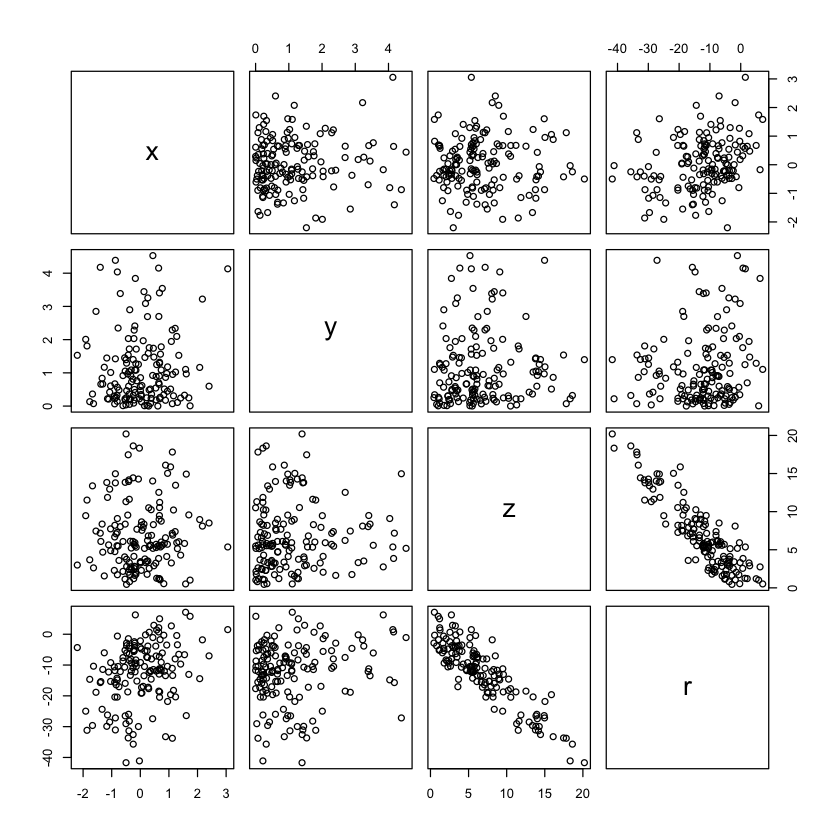

In [3]:
plot(dta)

Sometimes this plot is call a **draftsman plot**.
We notice a few interesting relationships
* $r$ and $z$ are related negatively. Increasing values of $z$ correspond to decreasing values of $r$
* $x$ is modestly related to $r$, y, and $z$ positively. Increasing values of $x$ corrspond to increasing values of $y$, $z$, and $r$

A **multiple linear regression (sometimes called a multivariate regression)** relates changes in $>$1 variable (the right-hand side of the equals signs) to a response variable, or variable to predict, or variable to explain (the left hand side of the equals sign). We can write this down in model form as 

\begin{align}
y_{i} &= \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in} + \epsilon_{i}\\
  \epsilon &\sim N(0,\sigma^2),
\end{align}

and using matrices and vectors, 

\begin{align}
y &= X \beta + \epsilon\\
  \epsilon &\sim N(0,\sigma^2),
\end{align}

where

$$
    \beta = \left[
        \begin{array}{c}
        \beta_{0}\\
        \beta_{1}\\
        \beta_{2}\\
        \vdots\\
        \beta_{n}\\
        \end{array} \right];
   X = \left[
   \begin{array}{ccccc}
   1       & x_{1,1} & x_{1,2} & \cdots & x_{1,n}\\
   1       & x_{2,1} & x_{2,2} & \cdots & x_{2,n}\\
   \vdots  & \vdots  & \vdots  & \vdots & \vdots \\
   1       & x_{i,1} & x_{i,2} & \cdots & x_{i,n}\\
   \vdots  & \vdots  & \vdots  & \vdots & \vdots \\
   1       & x_{M,1} & x_{M,2} & \cdots & x_{M,N}
   \end{array}\right]
$$
The parameters for each variable $(\beta)$ are stacked into a single vector.

The Matrix $X$ assigns one column per variable, and a column of $1$s to represent the intercept.



We can also write the above multiple regression in probabilistic form

$$
   y \sim N(X\beta,\sigma^2)
$$

Notice the same equation is used to represent simple linear regression and multiple linear regression. The differences between simple and multiple regression are folded into $X$ and $\beta$.




## Polynomial regression


We've discussed simple and multiple linear regression.
Now lets discuss how linear regression can apply to nonlinear relationships.

**Polynomial regression** supposes the functional form relating $y$ and $x$ is a polynomial

\begin{align*}
y_{i} &= f(x_{i}|\beta)\\
      &= \beta_{0} + \beta_{1}x_{i} + \beta_{2}x_{i}^2 + \beta_{3}x_{i}^3 + \cdots \beta_{n}x_{i}^n + \epsilon_{i}\\
\epsilon_{i} &\sim N(0,\sigma^2)
\end{align*}

We can rewrite this equation in matrix form

\begin{align*}
y_{i} &= f(x_{i}|\beta)\\
      &= X \beta + \epsilon\\
\epsilon & \sim N(0,\sigma^2)
\end{align*}



where 


$$
    \beta = \left[
        \begin{array}{c}
        \beta_{0}\\
        \beta_{1}\\
        \beta_{2}\\
        \vdots\\
        \beta_{n}\\
        \end{array} \right];
    X = \left[
    \begin{array}{ccccc}
   1       & x_{1} & x^{2}_{1} & \cdots & x^{n}_{1}\\
   1       & x_{2} & x^{2}_{2} & \cdots & x^{n}_{2}\\
   \vdots  & \vdots  & \vdots  & \vdots & \vdots \\
   1       & x_{i} & x^{2}_{i} & \cdots & x^{n}_{i}\\
   \vdots  & \vdots  & \vdots  & \vdots & \vdots \\
   1       & x_{M} & x^{2}_{M} & \cdots & x^{N}_{M}
   \end{array}\right]
$$
    


Here the matrix $X$ looks slightly different than in multiple regression.
The first column of $1$s is a place-holder for an intercept.
The second column is the linear term $x_{i}$, the next column a quadratic term $x_{i}^{2}$, next column a cubic term $x_{i}^{3}$ and so on.
The same observation $x$ is raised to higher powers as we move across columns.

Now lets look at an example.

In [4]:
data <- read.csv('polynomialData.csv')
head(data)

x,y
<dbl>,<dbl>
0.9958723,8.2420054
-0.6556163,2.3114202
-0.9176787,4.0842076
0.1963727,-5.5386897
1.0309346,2.5166174
1.2610719,-0.5388713


Here we just have $x$ values and $y$ values. The difference, they're not related to each other linearly.

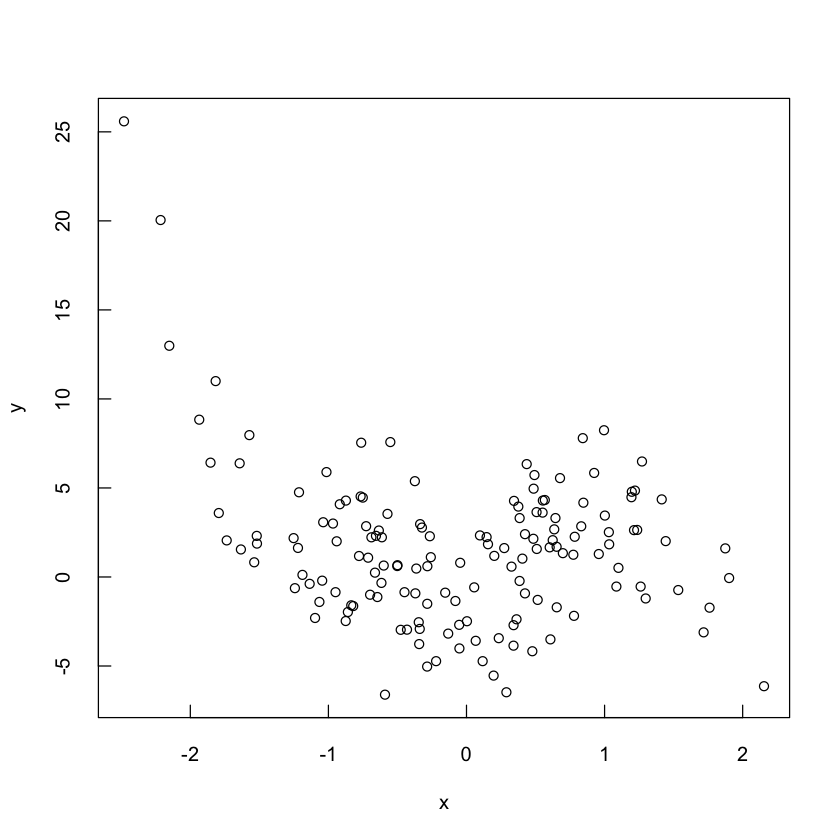

In [5]:
plot(data$x,data$y
     ,xlab="x"
     ,ylab="y"
     ,tck=0.02
)

The variable $x$ does not relate to $y$ linearly; fitting a straight line to this data may under-represent the more complicated relationship.

Lets fit three different models: a linear model, a quadratic model, and a cubic model.
We can plot each model fit and evaluate which model looks like it best represents the relationship between $x$ and $y$.

In [6]:
simpleLinearRegression <- lm(y~x,data=data)
print(simpleLinearRegression)

quadraticRegression <- lm(y~x+I(x^2),data=data)
print(quadraticRegression)

cubicRegression <- lm(y~x+I(x^2)+I(x^3),data=data)
print(cubicRegression)


Call:
lm(formula = y ~ x, data = data)

Coefficients:
(Intercept)            x  
      1.453       -1.253  


Call:
lm(formula = y ~ x + I(x^2), data = data)

Coefficients:
(Intercept)            x       I(x^2)  
   -0.08514     -0.81522      1.72492  


Call:
lm(formula = y ~ x + I(x^2) + I(x^3), data = data)

Coefficients:
(Intercept)            x       I(x^2)       I(x^3)  
     0.2994       2.2877       1.0962      -1.4120  



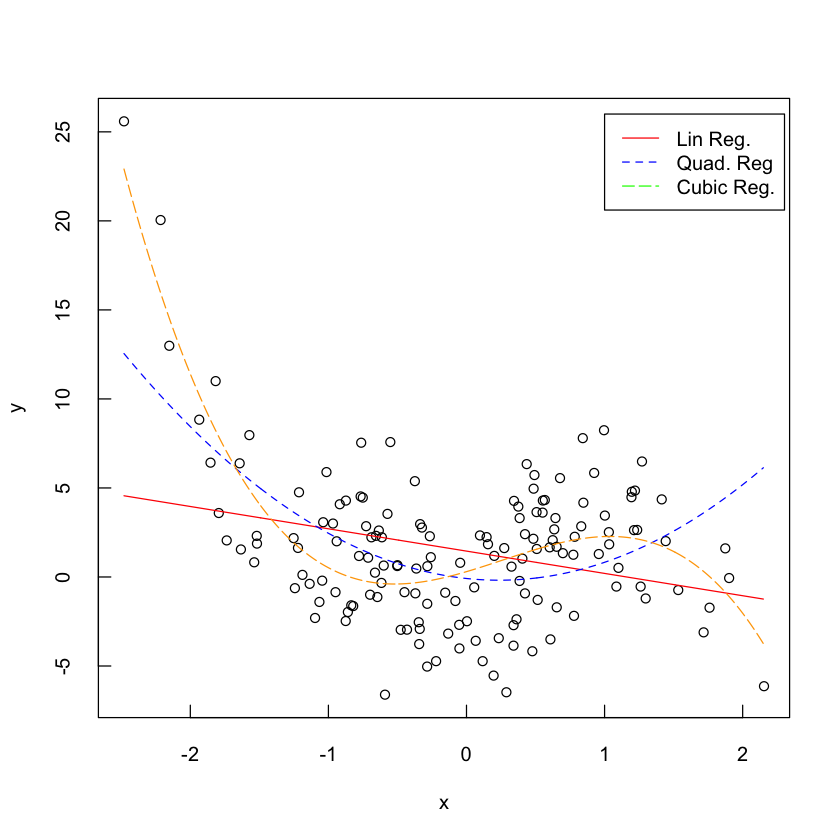

In [7]:
plot(data$x,data$y
     ,xlab="x"
     ,ylab="y"
     ,tck=0.02
)

minX <- min(data$x)
maxX <- max(data$x)

#linear regression
betas <- coef(simpleLinearRegression)
beta0 <- betas[1]
beta1 <- betas[2]

xVals <- seq(minX,maxX,0.01)
linearYPredictions <- beta0 + beta1*xVals
lines(xVals,linearYPredictions,col='red')

#quadratic regression
betas <- coef(quadraticRegression)
beta0 <- betas[1]
beta1 <- betas[2]
beta2 <- betas[3]

xVals <- seq(minX,maxX,0.01)
quadraticYPredictions <- beta0 + beta1*xVals + beta2*xVals^2
lines(xVals,quadraticYPredictions,col='blue', lty=2)

#cubic regression
betas <- coef(cubicRegression)
beta0 <- betas[1]
beta1 <- betas[2]
beta2 <- betas[3]
beta3 <- betas[4]

xVals <- seq(minX,maxX,0.01)
cubicYPredictions <- beta0 + beta1*xVals + beta2*xVals^2 + beta3*xVals^3
lines(xVals,cubicYPredictions,col='orange',lty=5)


legend(1,26,legend=c("Lin Reg.","Quad. Reg", "Cubic Reg.")
                     ,col=c('red','blue','green')
                     ,lty=c(1,2,5)
)




What fit looks best?

## Optimization and assessing error

We can look at the three model fits to the data and visually assess fit, but a quantitative method for evaluating model fit is likely more convincing. A quantitative fit allows us to numerically compare model fits.

The most common metric for evaluating model fit is the **s**um **s**quares **r**rror (SSE).
Given a data set, the **SSE** sums over all observations $(y_{i},x_{i1},x_{i2},\cdots,x_{im})$ the squared difference between $(y_{i})$ and model predictions $[\hat{y}_{i} = f(x_{i}|\beta)]$

$$
   \text{SSE}(y,\hat{y}) = \sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}, 
$$

or in vector form,

$$
   \text{SSE}(y,\hat{y}) = (y - \hat{y})'(y - \hat{y}) 
$$

where 

\begin{align}
    y = \left[ \begin{array}{c}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{n} \end{array}
    \right]
\end{align}

and

\begin{align}
    y' = \left[ \begin{array}{c}
    y'_{1}\\
    y'_{2}\\
    \vdots\\
    y'_{n} \end{array}
    \right]
\end{align}



Intuitively, SSE is a measure of the distance between your data and model.
We can compute the SSE for the three above models fit to our non-linear data.

[1] "SSR Simple Linear Regression = 2519.69"

[1] "SSR Quadratic Regression = 1972.54"

[1] "SSR Cubic Regression = 1362.07"

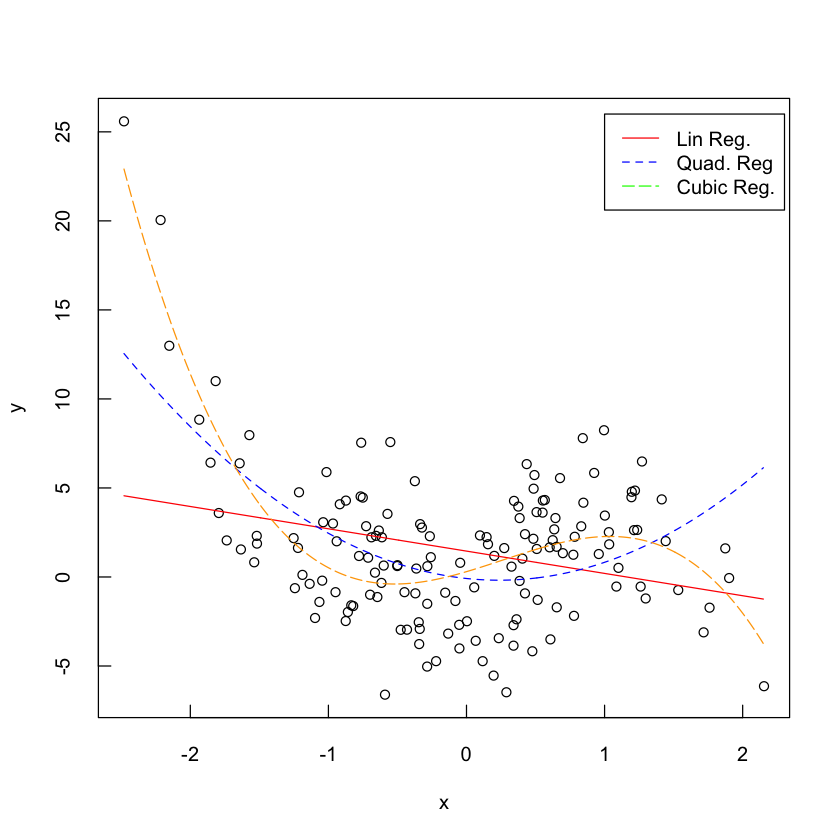

In [10]:
plot(data$x,data$y
     ,xlab="x"
     ,ylab="y"
     ,tck=0.02
)

minX <- min(data$x)
maxX <- max(data$x)

#linear regression
betas <- coef(simpleLinearRegression)
beta0 <- betas[1]
beta1 <- betas[2]

xVals <- seq(minX,maxX,0.01)
linearYPredictions <- beta0 + beta1*xVals
lines(xVals,linearYPredictions,col='red')

ssr_SLR = sum((fitted(simpleLinearRegression) - data$y)^2) #NEW


#quadratic regression
betas <- coef(quadraticRegression)
beta0 <- betas[1]
beta1 <- betas[2]
beta2 <- betas[3]

xVals <- seq(minX,maxX,0.01)
quadraticYPredictions <- beta0 + beta1*xVals + beta2*xVals^2
lines(xVals,quadraticYPredictions,col='blue', lty=2)

ssr_QR = sum((fitted(quadraticRegression) - data$y)^2) #NEW


#cubic regression
betas <- coef(cubicRegression)
beta0 <- betas[1]
beta1 <- betas[2]
beta2 <- betas[3]
beta3 <- betas[4]

xVals <- seq(minX,maxX,0.01)
cubicYPredictions <- beta0 + beta1*xVals + beta2*xVals^2 + beta3*xVals^3
lines(xVals,cubicYPredictions,col='orange',lty=5)

ssr_CR = sum((fitted(cubicRegression) - data$y)^2) #NEW


legend(1,26,legend=c("Lin Reg.","Quad. Reg", "Cubic Reg.")
                     ,col=c('red','blue','green')
                     ,lty=c(1,2,5)
)

sprintf("SSR Simple Linear Regression = %.2f",ssr_SLR)
sprintf("SSR Quadratic Regression = %.2f",ssr_QR)
sprintf("SSR Cubic Regression = %.2f",ssr_CR)



We see the the model with smallest sum square residual is the cubic model.
The difference between model predictions made by the cubic model and the empirical data is smallest.
In fact, the cubic model's SSR is 1.0-(1362.07/2519.69) 45% smaller than simple linear regression, and 1.0-(1972.54/2519.69) 21% smaller than quadratic regression.


## Minimizing SSE

### optimal within a model
We can take the idea that a smaller SSE suggests a better model fit further.
Instead of using SSE to compare different models, we can use the SSE to evaluate different parameter values inside the same model.

Consider the same dataset as above and suppose we're fitting a simple linear regression.
Then our SSE becomes

\begin{align}
    \text{SSE}(y,\hat{y}_{i}) &= \sum_{i=1}^{N} [y_{i} - \hat{y}_{i}]^2\\
    \text{SSE}(y,x,\beta_{0},\beta_{1}) &= \sum_{i=1}^{N} [y_{i} - (\beta_{0} + \beta_{1}x_{i})]^2\\
\end{align}

where $y$ and $x$ are vectors of data.
Step two in above equation replaced the predicted value $\hat{y}$ with the linear model used to make this prediction $\beta_{0}+\beta_{1}x$.

Now our SSE is a function of the data, that cannot be changed, and the parameters of our model $\beta_{0}$ and $\beta_{1}$. 
Changing $\beta_{0}$ or $\beta_{1}$ will change the value of the SSE.
One way to find a best fit model is to find those parameters value that make the SSE as small as possible. 


### derivative

SSE is a function of $\beta_{0}$ and $\beta_{1}$, and can be optimized by taking the derivative with respect to both parameters and finding the point where the derivative of these two equations equals zero simultaneously.

We take the derivative with respect to $\beta_{0}$

\begin{align}
   \frac{ d \text{SSE}(\beta_{0},\beta_{1})}{d \beta_{0}} &= \sum_{i=1}^{N} [y_{i} - (\beta_{0} + \beta_{1}x_{i})]^2\\
   \frac{ d \text{SSE}(\beta_{0},\beta_{1})}{d \beta_{0}} &= \sum_{i=1}^{N} \frac{d}{d \beta_{0}} [y_{i} - (\beta_{0} + \beta_{1}x_{i})]^2\\
  \frac{ d \text{SSE}(\beta_{0},\beta_{1})}{d \beta_{0}}  &= \sum_{i=1}^{N} -2[y_{i} - (\beta_{0} + \beta_{1}x_{i})]\\
\end{align}

The above derivative can be set to zero and solved for $\beta_{0}$, our variable.

\begin{align}
    \sum_{i=1}^{N} -2[y_{i} - (\beta_{0} + \beta_{1}x_{i})] &= 0\\
    \sum_{i=1}^{N} y_{i} - N\beta_{0} - \beta_{1}\sum_{i=1}^{N} x_{i} &=0\\
    N\beta_{0} &= \sum_{i=1}^{N} y_{i} - \beta_{1}\sum_{i=1}^{N} x_{i}\\
     \beta_{0} &= \bar{y} - \beta_{1}\bar{x}\\
\end{align}

The value for $\beta_{0}$ that optimizes the SSE is the average of our $y$ values minus the optimal $\beta_{1}$ times the average of our $x$ values. 

We must also take the derivative with respect to $\beta_{1}$.

\begin{align}
   \frac{ d \text{SSE}(\beta_{0},\beta_{1})}{d \beta_{1}} &= \sum_{i=1}^{N} [y_{i} - (\beta_{0} + \beta_{1}x_{i})]^2\\
   \frac{ d \text{SSE}(\beta_{0},\beta_{1})}{d \beta_{1}} &= \sum_{i=1}^{N} -2x_{i}[y_{i} - (\beta_{0} + \beta_{1}x_{i})]\\
\end{align}

The above equation can also be set to zero and solved for $\beta_{1}$.

\begin{align}
    \sum_{i=1}^{N} -2x_{i}[y_{i} - (\beta_{0} + \beta_{1}x_{i})] &=0 \\
    \sum_{i=1}^{N} x_{i}y_{i} - x_{i}\beta_{0} - \beta_{1}x^{2}_{i} &=0 \\
\end{align}    
   
At this point we can substitute the optimal value for $\beta_{0}$ we derived.

\begin{align}
    \sum_{i=1}^{N} x_{i}y_{i} - x_{i}(\bar{y} - \beta_{1}\bar{x}) - \beta_{1}x^{2}_{i} &=0 \\    
    \sum_{i=1}^{N} x_{i}y_{i} - \sum_{i=1}^{N} x_{i}\bar{y} + \sum_{i=1}^{N} x_{i}\beta_{1}\bar{x} - \beta_{1}x^{2}_{i} &=0 \\    
    \beta_{1} \left(x^{2}_{i} - \sum_{i=1}^{N} x_{i}\bar{x}\right) &=\sum_{i=1}^{N} x_{i}y_{i} - \sum_{i=1}^{N} x_{i}\bar{y}\\
    \beta_{1} &= \frac{\sum_{i=1}^{N} x_{i}y_{i} - \sum_{i=1}^{N} x_{i}\bar{y}}{\left(x^{2}_{i} - \sum_{i=1}^{N} x_{i}\bar{x}\right)}
\end{align}

This equation for $\beta_{1}$ doesn't look like anything we can recognize, but we can change the SSE we optimized to make this equation look more familiar.
The equation we optimized was a function of $\beta_{0}$ and $\beta_{1}$, and so adding a constant value that does not include $\beta_{0}$ or $\beta_{1}$ would not change the optimal $\beta$.

From each data point, lets subtract $\bar{x}$ and $\bar{y}$, called centering our data.
Then the above equation becomes

\begin{align}
    \beta_{1} &= \frac{\sum_{i=1}^{N} x_{i}y_{i} - \sum_{i=1}^{N} x_{i}\bar{y}}{\left(x^{2}_{i} - \sum_{i=1}^{N} x_{i}\bar{x}\right)}\\
              &=\frac{\sum_{i=1}^{N} (x_{i}-\bar{x})(y_{i}-\bar{y}) - \sum_{i=1}^{N} (x_{i}-\bar{x})\bar{y}}{\sum_{i=1}^{N} (x_{i}-\bar{x})^{2} - \bar{x} \sum_{i=1}^{N} (x_{i}-\bar{x}) }\\
              &=\frac{\sum_{i=1}^{N} (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N} (x_{i}-\bar{x})^{2} }\\
              &= \frac{Cov(X,Y)}{Var(X)}
\end{align}

Centering our data, we see the optimal $\beta_{1}$ is the covariance between $y$ and $x$ divided by the variance of $x$.


We can also right the above in matrix form.
The covariance between X and Y is written 

$$
    Cov(X,Y) = X'y
$$
where $X = x-\bar{x}$ and $Y=y-\bar{y}$, and the variance of X is written 

$$
Var(X) = X'X.
$$

Then the expression for $\beta_{1}$ is

$$
\beta_{1} = (X'X)^{-1}(X'y)
$$


But by adding a column of $1$s to X, we can see that the above expression works for both $\beta_{1}$ and $\beta_{0}$.
In fact, this expression will work for any design matrix $X$.

So we can write

$$
\beta = (X'X)^{-1}(X'y)
$$

To see this more clearly, let's generalize our derivations of $\beta_{0}$ and $\beta_{1}$ to multiple $\beta$s.

We first form our SSE for multiple linear regression

$$
\text{SSE}(y,X,\beta_{0},\beta_{1}) = \sum_{i=1}^{N} [y_{i} - (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in} )]^2\\
$$

where $x_{ij}$ is observation $i$ for variable $j$.
Taking the derivative for every $\beta$ and setting equal to $0$ we have

For $\beta_{0}$

\begin{align}
\sum_{i=1}^{N} 1[y_{i} - (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in})] &= 0\\
\sum_{i=1}^{N} (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in}) &= \sum_{i=1}^{N} 1 y_{i}\\
\end{align}

For $\beta_{1}$


\begin{align}
\sum_{i=1}^{N} x_{i1}[y_{i} - (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in})] &=0\\
\sum_{i=1}^{N} x_{i1} (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in}) &=\sum_{i=1}^{N} x_{i1}y_{i}\\
\end{align}

For $\beta_{2}$


\begin{align}
\sum_{i=1}^{N} x_{i2}[y_{i} - (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in})] =0 \\
\sum_{i=1}^{N} x_{i2} (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in}) &=\sum_{i=1}^{N} x_{i2}y_{i}\\
\end{align}

For $\beta_{n}$


\begin{align}
\sum_{i=1}^{N} x_{in}[y_{i} - (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in})] =0 \\
\sum_{i=1}^{N} x_{in} (\beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots \beta_{n}x_{in}) &=\sum_{i=1}^{N} x_{in}y_{i}\\
\end{align}

The right hand side of this system of equations can be rewritten as

$$
X'y,
$$

and the left hand side can be rewritten as 

$$
    (X'X)\beta.
$$

Our system of equations is then

$$
 (X'X)\beta = X'y.
$$

We can solve for $\beta$ by left multiplying each side by $(X'X)^{-1}$

$$
\beta = (X'X)^{-1}X'y
$$

and arriving at the same solution for multiple linear regression that we found with simple linear regression.

We can verify that the above equation $(X'X)^{-1}X'y$ recovers the optimal $\beta$s using R.

In [25]:
print(cubicRegression)

y <- data$y
ones = rep(1,length(data$x))
x    = data$x
x2   = data$x^2
x3   = data$x^3

X = cbind(ones,x,x2,x3)
print(head(X))

optimalBetas <- solve(t(X)%*%X,t(X)%*%y)  # this is the same as solving our system of equatons.
print(round(optimalBetas,4))



Call:
lm(formula = y ~ x + I(x^2) + I(x^3), data = data)

Coefficients:
(Intercept)            x       I(x^2)       I(x^3)  
     0.2994       2.2877       1.0962      -1.4120  

     ones          x         x2           x3
[1,]    1  0.9958723 0.99176166  0.987667975
[2,]    1 -0.6556163 0.42983269 -0.281805304
[3,]    1 -0.9176787 0.84213426 -0.772808705
[4,]    1  0.1963727 0.03856225  0.007572574
[5,]    1  1.0309346 1.06282620  1.095704329
[6,]    1  1.2610719 1.59030227  2.005485460
        [,1]
ones  0.2994
x     2.2877
x2    1.0962
x3   -1.4120


The beta coefficients we found from running a cubic regression match the beta coefficients from solving the system of equations above that minimize the SSE. 

### (an aside) the linear in linear regression

Note that all the relationships linking $x$ and $y$ could be expressed using the same equation 

$$
   y \sim N(X\beta,\sigma^2)
$$

Why then is this called **linear** regression?

The **linear** in linear regression refers to the parameters.
Lets look a the model form of a cubic regression.

\begin{align}
    y &= \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3\\
    \epsilon &\sim N(0,\sigma^2)
\end{align}



We can rewrite the above equation, so that it looks a bit more like multiple regression.

\begin{align}
    y &= \beta_{0} + \beta_{1}x + \beta_{2}q + \beta_{3}r\\
    q &= x^2\\
    r &= x^3\\
    \epsilon &\sim N(0,\sigma^2)
\end{align}

Our equation now is linear in $\beta$ and in reference to three variables: $x$, $q$, and $r$.
We can do this with any functional form for $x$. The "linear" refers to the parameters.
